# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars2_soup = soup(html, "html.parser")

In [5]:
# Extract all rows of data
# Create an empty list
# Loop through the scraped data to create a list of rows

In [6]:
# Create empty list
mars_weather = []

In [7]:
# Select the table
table = mars2_soup.find("table", class_="table")

In [8]:
# Store all rows from table into one variable
for mars_weather_data in table.find_all("tbody"):
    rows = mars_weather_data.find_all("tr", class_="data-row")
    # Loop through table to scrape the data
    for row in rows:
        id = row.find_all("td")[0].text
        terrestrial_date = row.find_all("td")[1].text
        sol = row.find_all("td")[2].text
        ls = row.find_all("td")[3].text
        month = row.find_all("td")[4].text
        min_temp = row.find_all("td")[5].text
        pressure = row.find_all("td")[6].text
        # Add scraped data to list
        mars_weather.append({
            "id": id,
            "terrestrial_date": terrestrial_date,
            "sol": sol,
            "ls": ls,
            "month": month,
            "min_temp": min_temp,
            "pressure": pressure
        })
mars_weather

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df_mars_data = pd.DataFrame(mars_weather)

In [10]:
# Confirm DataFrame was created successfully
df_mars_data

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
check_dt = df_mars_data.dtypes
print(check_dt)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [12]:
# DELETE

df_mars_data.to_csv("Resources/marsdata.csv", index=False, header=True)

In [13]:
df_mars_data = df_mars_data.astype({
                    "id": "int",
                    "terrestrial_date": ("datetime64").format("%y%m%d"),
                    "sol": "int",
                    "ls": "int",
                    "month": "int",
                    "min_temp": "float",
                    "pressure": "float"
})
df_mars_data

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [14]:
# Confirm type changes were successful by examining data types again
check_dt = df_mars_data.dtypes
print(check_dt)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [44]:
# How many months are there on Mars?
total_terrestrial_days = df_mars_data["terrestrial_date"].count()
print(f"a.) The total number of earth days in Curiousity's visit was: {total_terrestrial_days} days.")
martian_year_sol_days = 687 #Nasa.gov
print(f"b.) According to Nasa, a Martian year has {martian_year_sol_days} days.")
martian_years_during_visit = total_terrestrial_days/martian_year_sol_days
print(f"c.) Curiousity's visit was {martian_years_during_visit:.2f} Martian years.")
earth_days_in_month = 30.41
print(f"d.) There are {earth_days_in_month} earth days per month.")

a.) The total number of earth days in Curiousity's visit was: 1867 days.
b.) According to Nasa, a Martian year has 687 days.
c.) Curiousity's visit was 2.72 Martian years.
d.) There are 30.41 earth days per month.


In [45]:
# 2. How many Martian days' worth of data are there?
sol_count = df_mars_data["sol"].count()
print(f"There are {sol_count} Martian days worth of data.")


There are 1867 Martian days worth of data.


In [60]:
# 3. What is the average low temperature by month?
df_average_low_temp = df_mars_data.groupby(["month"])["min_temp"].mean()
print(df_average_low_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


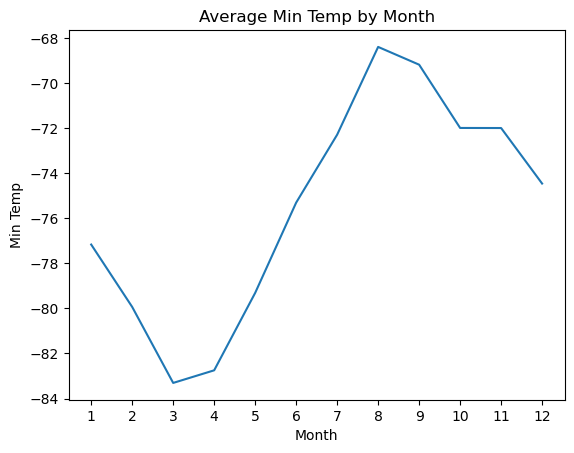

In [62]:
# Plot the average temperature by month
plt.plot(df_average_low_temp)

plt.title("Average Min Temp by Month")
plt.xlabel("Month")
plt.ylabel("Min Temp")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

plt.show()

In [69]:
# Identify the coldest and hottest months in Curiosity's location
df_coldest_month = df_mars_data.groupby(["month"])["min_temp"].min()
#df_hottest_month = df_mars_data.groupby(["month"])["min_temp"].max()
print(df_coldest_month)
#print(df_hottest_month)


month
1    -82.0
2    -86.0
3    -90.0
4    -89.0
5    -85.0
6    -84.0
7    -78.0
8    -75.0
9    -78.0
10   -81.0
11   -78.0
12   -81.0
Name: min_temp, dtype: float64


In [21]:
# 4. Average pressure by Martian month
average_pressure = df_mars_data.groupby(["month"])["pressure"].mean()
print(average_pressure)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


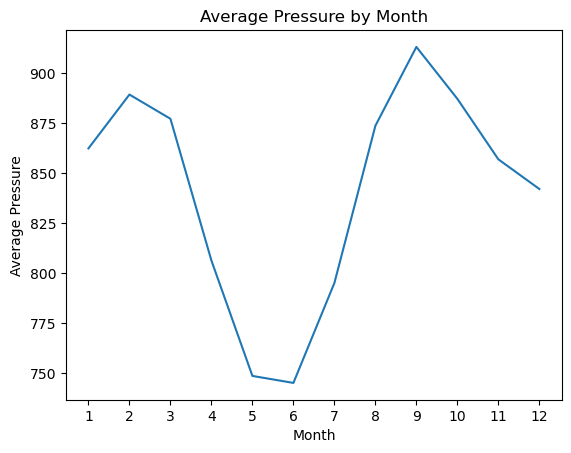

In [66]:
# Plot the average pressure by month
plt.plot(average_pressure)

plt.title("Average Pressure by Month")
plt.xlabel("Month")
plt.ylabel("Average Pressure")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

plt.show()

In [23]:
# 5. How many terrestrial (earth) days are there in a Martian year?


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
df_mars_data.to_csv("Resources/MarsDataFrame.csv", index=False, header=True)

In [25]:
browser.quit()